# Deepen the depth of the Saanich Inlet Sill using bathymetry 202108 : based on Process202108Bathymetry.ipynb (tools/bathymetry)

In [1]:


import cmocean.cm as cm 
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import bathy_tools, nc_tools, viz_tools

%matplotlib inline

import matplotlib.colors as matcolors
import matplotlib.cm as cmx

In [2]:
# Plotting Set Up
cmap = cm.deep
cmap.set_bad('darkgreen')
ylim = (47, 51)
xlim = (-126.3, -122.2)
ylimSI = (48.5, 48.8)
xlimSI = (-123.65, -123.3)
ylimSIS = (48.67, 48.75)
xlimSIS = (-123.47, -123.35)
cNorm  = matcolors.Normalize(vmin=0, vmax=14)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='cool')

In [3]:
# function to check depth range
def depth_check(bathy):
    for i in range(bathy.shape[0]):
        for j in range(bathy.shape[1]):
            if bathy[i, j] > 428:
                print ('Deep: ', i, j, bathy[i ,j])
            elif bathy[i, j] < 4 and bathy[i, j] > 0:
                print ('Shallow: ', i, j, bathy[i, j])

/tmp/ipykernel_16032/3256443904.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax.pcolormesh(lon[:], lat[:], old_bathy[:], cmap=cmap)


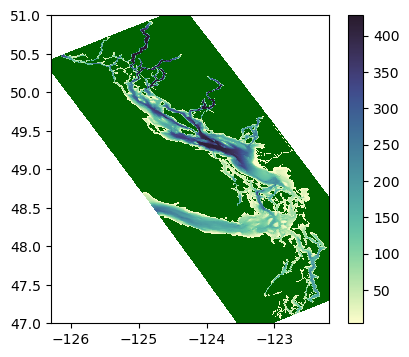

In [4]:
bathyfile = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202108.nc')
lon = bathyfile.variables['nav_lon']
lat = bathyfile.variables['nav_lat']
old_bathy = bathyfile.variables['Bathymetry']

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], old_bathy[:], cmap=cmap)
fig.colorbar(mesh, ax=ax)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
depth_check(old_bathy[:])



/tmp/ipykernel_16032/760920502.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax[0].pcolormesh(lon[:], lat[:], old_bathy[:], cmap=cmap)
/tmp/ipykernel_16032/760920502.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax[1].pcolormesh(lon[:], lat[:], old_bathy[:], cmap=cmap, vmin=50, vmax=120)


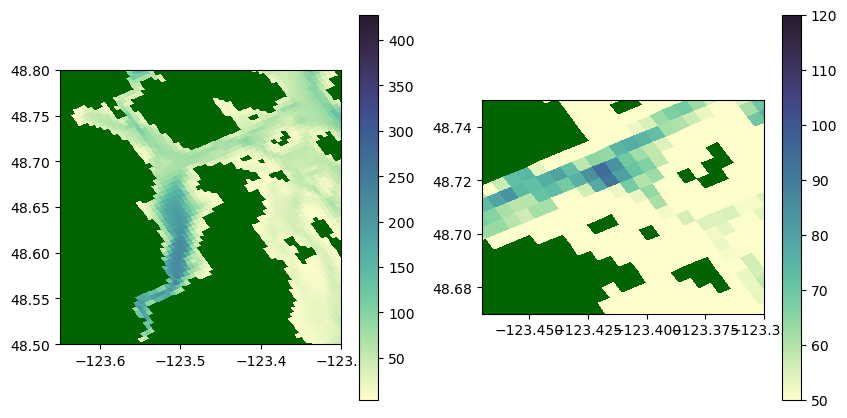

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
viz_tools.set_aspect(ax[0], coords='map')
mesh = ax[0].pcolormesh(lon[:], lat[:], old_bathy[:], cmap=cmap)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_ylim(ylimSI)
ax[0].set_xlim(xlimSI)


viz_tools.set_aspect(ax[1], coords='map')
mesh = ax[1].pcolormesh(lon[:], lat[:], old_bathy[:], cmap=cmap, vmin=50, vmax=120)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_ylim(ylimSIS)
ax[1].set_xlim(xlimSIS)
depth_check(old_bathy[:])

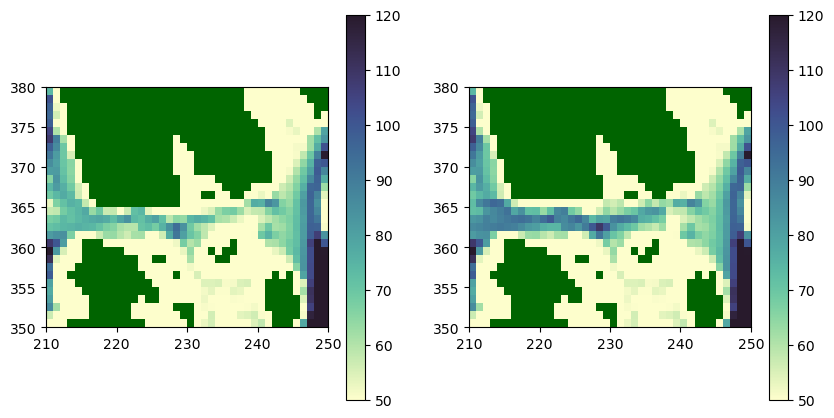

In [35]:
istart, iend = 215, 237
jstart, jend = 363, 364

bathy = np.copy(old_bathy[:])
masked = np.ma.masked_array(bathy, bathy == 0)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
viz_tools.set_aspect(ax[0], coords='map')
mesh = ax[0].pcolormesh(masked, cmap=cmap, vmin=50, vmax=120)
fig.colorbar(mesh, ax=ax[0])
#ax[0].set_ylim(ylimSIS)
#ax[0].set_xlim(xlimSIS)
ax[0].set_xlim([210, 250])
ax[0].set_ylim([350, 380])
#ax[0].plot(np.arange(295, 298)+0.5, 422*np.ones((3))+0.5, 'sm');

# used for bathymetry_202310.nc
pointsi = np.arange(210, 238).astype(int)
pointsj = 363 * np.ones(pointsi.shape).astype(int)
bathy[pointsj+2, pointsi] = bathy[pointsj+2, pointsi] + 20.
bathy[pointsj+1, pointsi] = bathy[pointsj+1, pointsi] + 15.
bathy[pointsj, pointsi] = bathy[pointsj, pointsi] + 15.
bathy[pointsj-1, pointsi] = bathy[pointsj-1, pointsi] + 15.

masked = np.ma.masked_array(bathy, bathy == 0)

viz_tools.set_aspect(ax[1], coords='map')
mesh = ax[1].pcolormesh(masked, cmap=cmap, vmin=50, vmax=120)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_xlim([210, 250])
ax[1].set_ylim([350, 380])
depth_check(old_bathy[:])

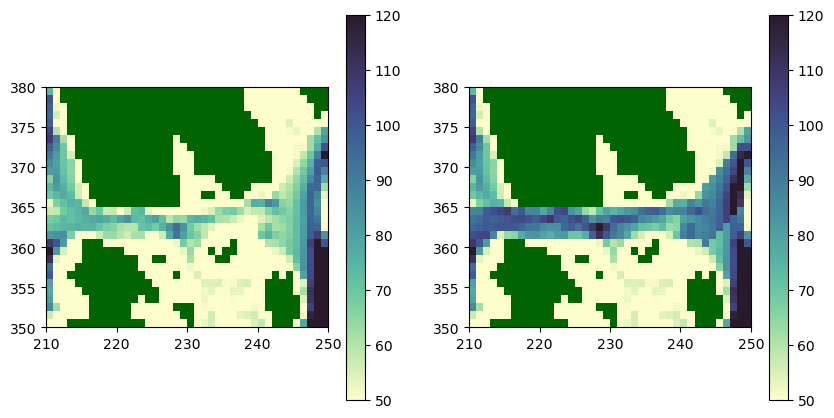

In [36]:
istart, iend = 215, 237
jstart, jend = 363, 364

bathy = np.copy(old_bathy[:])
masked = np.ma.masked_array(bathy, bathy == 0)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
viz_tools.set_aspect(ax[0], coords='map')
mesh = ax[0].pcolormesh(masked, cmap=cmap, vmin=50, vmax=120)
fig.colorbar(mesh, ax=ax[0])
#ax[0].set_ylim(ylimSIS)
#ax[0].set_xlim(xlimSIS)
ax[0].set_xlim([210, 250])
ax[0].set_ylim([350, 380])
#ax[0].plot(np.arange(295, 298)+0.5, 422*np.ones((3))+0.5, 'sm');

# used for bathymetry_202310.nc
#pointsi = np.arange(210, 238).astype(int)
#pointsj = 363 * np.ones(pointsi.shape).astype(int)
#bathy[pointsj+2, pointsi] = bathy[pointsj+2, pointsi] + 20.
#bathy[pointsj+1, pointsi] = bathy[pointsj+1, pointsi] + 15.
#bathy[pointsj, pointsi] = bathy[pointsj, pointsi] + 15.
#bathy[pointsj-1, pointsi] = bathy[pointsj-1, pointsi] + 15.

# used for bathymetry_202310b.nc
pointsi = np.arange(210, 243).astype(int)
pointsj = 363 * np.ones(pointsi.shape).astype(int)
bathy[pointsj-2, pointsi] = bathy[pointsj-2, pointsi] + 20.
bathy[pointsj-1, pointsi] = bathy[pointsj-1, pointsi] + 25.
bathy[pointsj, pointsi] = bathy[pointsj, pointsi] + 25.
bathy[pointsj+1, pointsi] = bathy[pointsj+1, pointsi] + 30.

pointsj2 = np.arange(365, 373).astype(int)
pointsi2 = 243 * np.ones(pointsj2.shape).astype(int)
bathy[pointsj2-5, pointsi2] = bathy[pointsj2-5, pointsi2] + 25.
bathy[pointsj2-4, pointsi2+1] = bathy[pointsj2-4, pointsi2+1] + 25.
bathy[pointsj2-3, pointsi2+2] = bathy[pointsj2-3, pointsi2+2] + 25.
bathy[pointsj2-2, pointsi2+3] = bathy[pointsj2-2, pointsi2+3] + 25.
bathy[pointsj2-1, pointsi2+4] = bathy[pointsj2-1, pointsi2+4] + 25.
bathy[pointsj2, pointsi2+5] = bathy[pointsj2, pointsi2+5] + 25.


masked = np.ma.masked_array(bathy, bathy == 0)

viz_tools.set_aspect(ax[1], coords='map')
mesh = ax[1].pcolormesh(masked, cmap=cmap, vmin=50, vmax=120)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_xlim([210, 250])
ax[1].set_ylim([350, 380])
depth_check(old_bathy[:])

In [24]:
#final_bathy = masked

# Write out

In [25]:
ysize = final_bathy.shape[0]; xsize = final_bathy.shape[1]
print (ysize, xsize)

898 398


In [26]:
#bathy202108 = nc.Dataset('./bathymetry_202310.nc', 'w')
bathy202108 = nc.Dataset('./bathymetry_202310b.nc', 'w')
bathy202108.createDimension('y', ysize)
bathy202108.createDimension('x', xsize)
nc_tools.show_dimensions(bathy202108)

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398


In [27]:
newlons = bathy202108.createVariable('nav_lon', float, ('y', 'x'), zlib=True)
newlons.setncattr('units', 'degrees_east')
newlons.setncattr('long_name', 'longitude')
newlats = bathy202108.createVariable('nav_lat', float, ('y', 'x'), zlib=True)
newlats.setncattr('units', 'degrees_north')
newlats.setncattr('long_name', 'latitude')

newdepths = bathy202108.createVariable(
    'Bathymetry', float, ('y', 'x'), 
    zlib=True, least_significant_digit=0.1, fill_value=0)
newdepths.setncattr('units', 'metres')
newdepths.setncattr('long_name', 'sea_floor_depth')

newlons[:] = lon[:]
newlats[:] = lat[:]
newdepths[:] = final_bathy[:]

In [28]:
print (final_bathy.max())

428.0


In [29]:
print (newlons)

<class 'netCDF4._netCDF4.Variable'>
float64 nav_lon(y, x)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used


In [30]:
#nc_tools.init_dataset_attrs(bathy202108, 'Bathymetry 202310', 'bathymetry-deepen-SI-Sill',
#                           'bathymetry_202310.nc', 
#                            'Bathymetry processed 202310 Bathymetry. Deepen the deep of Victoria Sill')
nc_tools.init_dataset_attrs(bathy202108, 'Bathymetry 202310b', 'bathymetry-deepen-SI-Sill',
                           'bathymetry_202310b.nc', 
                            'Bathymetry processed 202310 Bathymetry. Deepen the deep of Victoria Sill')


file format: NETCDF4
Conventions: CF-1.6
title: Bathymetry 202310b
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: REQUIRED
references: REQUIRED
history: [2023-10-29 20:37:38] Created netCDF4 zlib=True dataset.
comment: Bathymetry processed 202310 Bathymetry. Deepen the deep of Victoria Sill


not found!


In [31]:
#bathy202108.setncattr('references', '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310.nc')
bathy202108.setncattr('references', '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')
bathy202108.setncattr('source', '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry-deepen-SI-Sill.ipynb')

In [32]:
nc_tools.check_dataset_attrs(bathy202108)

In [33]:
nc_tools.show_dataset_attrs(bathy202108)

file format: NETCDF4
Conventions: CF-1.6
title: Bathymetry 202310b
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: /ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry-deepen-SI-Sill.ipynb
references: /ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc
history: [2023-10-29 20:37:38] Created netCDF4 zlib=True dataset.
comment: Bathymetry processed 202310 Bathymetry. Deepen the deep of Victoria Sill


In [34]:
bathy202108.close()
